<img align="left" src="img/notebook_banner_siegel.png" style="width:1100px;">

# Introduction to geospatial vector data in Python

In [1]:
%matplotlib inline

import pandas as pd
import geopandas
import geoplot

pd.options.display.max_rows = 10

### Importing geospatial data

Using geospatial data means using a large variety of different formats like ratser or vector data, e.g. GeoJSON, shapefiles (esri), PostGIS (PostgreSQL) databases or raster datasets from satellites for example. Here we focus on vector data.

We can use the GeoPandas library to read many of those GIS file formats (relying on`fiona`, GDAL/OGR interface), using the `geopandas.read_file` function.

For example, let's start by reading a shapefile with all the countries of the world (adapted from http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/, zip file is available in the `/data` directory), and inspect the data:

In [2]:
countries = geopandas.read_file("zip://./data/ne_110m_admin_0_countries.zip")
# or if the archive is unpacked:
# countries = geopandas.read_file("data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

In [3]:
countries.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


<AxesSubplot:>

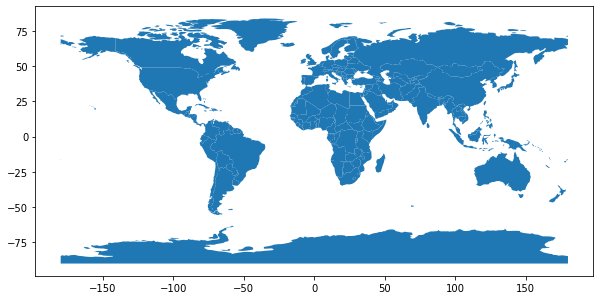

In [4]:
countries.plot(figsize=(10,10))

What can we observe:

- Using `.head()` to see first row
- 'geometry' column represents country polygons
- The `.plot()` function can give a quick visualisation

### What's a GeoDataFrame?

We used the GeoPandas library to read in the geospatial data, and this returned us a `GeoDataFrame`:

In [5]:
type(countries)

geopandas.geodataframe.GeoDataFrame

A GeoDataFrame contains a tabular, geospatial dataset:

* It has a **'geometry' column** that holds the geometry information (or features in GeoJSON).
* The other columns are the **attributes** (or properties in GeoJSON) that describe each of the geometries

Such a `GeoDataFrame` is just like a pandas `DataFrame`, but with some additional functionality for working with geospatial data:

* A `.geometry` attribute that always returns the column with the geometry information (returning a GeoSeries). The column name itself does not necessarily need to be 'geometry', but it will always be accessible as the `.geometry` attribute.
* It has some extra methods for working with spatial data (area, distance, buffer, intersection, ...), which we will see in later notebooks

In [6]:
countries.geometry

0      POLYGON ((61.21082 35.65007, 62.23065 35.27066...
1      MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...
2      POLYGON ((21.02004 40.84273, 20.99999 40.58000...
3      POLYGON ((51.57952 24.24550, 51.75744 24.29407...
4      MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...
                             ...                        
172    MULTIPOLYGON (((167.84488 -16.46633, 167.51518...
173    POLYGON ((52.00001 19.00000, 52.78218 17.34974...
174    POLYGON ((19.89577 -24.76779, 20.16573 -24.917...
175    POLYGON ((23.21505 -17.52312, 22.56248 -16.898...
176    POLYGON ((29.43219 -22.09131, 28.79466 -21.639...
Name: geometry, Length: 177, dtype: geometry

In [7]:
type(countries.geometry)

geopandas.geoseries.GeoSeries

In [8]:
countries.geometry.area

<ipython-input-8-68baff36b7de>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries.geometry.area


0       63.593500
1      103.599439
2        3.185163
3        7.095047
4      278.923392
          ...    
172      0.631326
173     38.475618
174    112.718524
175     62.789498
176     32.280371
Length: 177, dtype: float64

For example, we can calculate average population number over all countries (by accessing the 'pop_est' column, and calling the `mean` method on it):

In [9]:
countries['pop_est'].median()

9961396.0

In [10]:
countries['pop_est'].mean()

41712369.84180791

In [11]:
countries['pop_est'].sum()

7383089462.0

In [12]:
countries['pop_est'].var()

2.130697548123415e+16

In [13]:
print('\n','Median populaton of worlds countires:\n',countries['pop_est'].median(), '\n','Summed up populaton of worlds countries:\n',
       countries['pop_est'].sum(),  '\n','Standard deviation worlds countries:\n',
       countries['pop_est'].std(),'\n')


 Median populaton of worlds countires:
 9961396.0 
 Summed up populaton of worlds countries:
 7383089462.0 
 Standard deviation worlds countries:
 145969090.8419798 



Or, we can use boolean filtering to select a subset of the dataframe based on a condition:

In [14]:
africa = countries[countries['continent'] == 'Africa']

<AxesSubplot:>

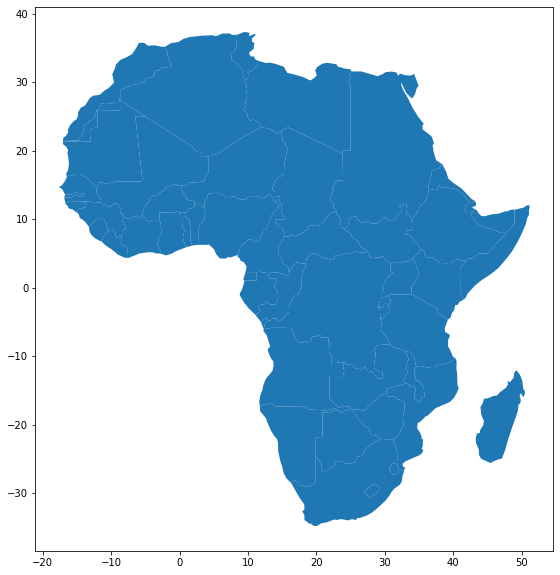

In [15]:
africa.plot(figsize=(10,10))

---
We assume, we have some 'pandas' basic

Resources in case you want to learn more about pandas:

- Pandas docs: https://pandas.pydata.org/pandas-docs/stable/10min.html
- Other tutorials on github, there are tons of them, hit 'pandas-tutorial' into the search line and start!

<div class="alert alert-info" style="font-size:100%">
<b>Take away</b>: <br>

<ul>
  <li>A `GeoDataFrame` allows to perform typical tabular data analysis together with spatial operations</li>
  <li>A `GeoDataFrame` (or *Feature Collection*) consists of:
   <ul>
    <li>**Geometries** or **features**: the spatial objects</li>
    <li>**Attributes** or **properties**: columns with information about each spatial object</li>
   </ul>
  </li>
</ul>
</div>

## Geometries: Points, Linestrings and Polygons

Spatial **vector** data can consist of different types, and the 3 fundamental types are:

* **Point** data: represents a single point in space.
* **Line** data ("LineString"): represents a sequence of points that form a line.
* **Polygon** data: represents a filled area.

And each of them can also be combined in multi-part geometries (See https://shapely.readthedocs.io/en/stable/manual.html#geometric-objects for extensive overview).

For the example we have seen up to now, the individual geometry objects are Polygons:

In [16]:
print(countries.geometry[176])

POLYGON ((29.43218834810904 -22.09131275806759, 28.79465620292422 -21.63945403410745, 28.02137007010862 -21.48597503020058, 27.72722781750326 -20.85180185311471, 27.72474734875325 -20.49905852629039, 27.29650475435051 -20.391519870691, 26.16479088715849 -19.29308562589494, 25.85039147309473 -18.71441293709054, 25.64916344575016 -18.53602589281899, 25.26422570160801 -17.73653980883142, 26.38193525564893 -17.8460421688579, 26.70677330903564 -17.96122893643648, 27.04442711763073 -17.93802621833743, 27.59824344250276 -17.29083058031401, 28.46790612154268 -16.46840016038885, 28.8258687680285 -16.38974863044061, 28.94746341321127 -16.04305144619444, 29.51683434420315 -15.64467782965639, 30.27425581230511 -15.50778696051521, 30.33895470553454 -15.88083912523025, 31.17306399915768 -15.86094369879787, 31.63649824395119 -16.07199024827788, 31.8520406430406 -16.31941700609138, 32.32823896661023 -16.39207406989375, 32.84763878757585 -16.71339812588462, 32.84986087416439 -17.97905730557718, 32.6548

Let's import some other datasets with different types of geometry objects.

A dateset about cities in the world (adapted from http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/, zip file is available in the `/data` directory), consisting of Point data:

In [17]:
cities = geopandas.read_file("zip://./data/ne_110m_populated_places.zip")

In [18]:
print(cities.geometry[0])

POINT (12.45338654497177 41.90328217996012)


And a dataset of rivers in the world (from http://www.naturalearthdata.com/downloads/50m-physical-vectors/50m-rivers-lake-centerlines/, zip file is available in the `/data` directory) where each river is a (multi-)line:

In [19]:
rivers = geopandas.read_file("zip://./data/ne_50m_rivers_lake_centerlines.zip")

In [20]:
print(rivers.geometry[0])

LINESTRING (51.9371337598152 55.70106609892139, 51.88086646731369 55.68625891701544, 51.82031249962222 55.69745514553858, 51.7476018274624 55.69366250841807, 51.6628417966117 55.60817291874525, 51.57871093775964 55.59943268477065, 51.51342773400279 55.58312409100404, 51.50854492161091 55.52948639548083, 51.48583984403365 55.49640534033426, 51.36914062543957 55.46796295772435, 51.21306254869774 55.50264985760492, 51.13452148447897 55.48273346527725, 51.07934570274205 55.46759674659262, 50.98022460947817 55.46637604371949, 50.83445217522774 55.45630956063775, 50.6883789060617 55.42011139502489, 50.4118652342932 55.40119049644431, 50.07802734358711 55.38112213757665, 49.82216796867687 55.33466217681809, 49.53222656260584 55.260614325191, 49.38232421848795 55.17182037990665, 49.24808475131027 55.11301870345045)


### The `shapely` library

The individual geometry objects are provided by the [`shapely`](https://shapely.readthedocs.io/en/stable/) library

In [21]:
type(countries.geometry[0])

shapely.geometry.polygon.Polygon

To construct one ourselves:

In [62]:
from shapely.geometry import Point, Polygon, LineString

In [63]:
p = Point(1, 1)

In [64]:
print(p)

POINT (1 1)


In [65]:
polygon = Polygon([(1, 1), (2,2), (2, 1)])

<div class="alert alert-info" style="font-size:100%">
<b>Take away</b>: <br><br>

Single geometries are represented by `shapely` objects:

<ul>
  <li>If you access a single geometry of a GeoDataFrame, you get a shapely geometry object</li>
  <li>Those objects have similar functionality as geopandas objects (GeoDataFrame/GeoSeries). For example:
   <ul>
    <li>`single_shapely_object.distance(other_point)` -> distance between two points</li>
    <li>`geodataframe.distance(other_point)` ->  distance for each point in the geodataframe to the other point</li>
   </ul>
  </li>
</ul>
</div>

## Coordinate reference systems

A **coordinate reference system (CRS)** determines how the two-dimensional (planar) coordinates of the geometry objects should be related to actual places on the (non-planar) earth.

For a nice in-depth explanation, see https://docs.qgis.org/2.8/en/docs/gentle_gis_introduction/coordinate_reference_systems.html

A GeoDataFrame or GeoSeries has a `.crs` attribute which holds (optionally) a description of the coordinate reference system of the geometries:

In [66]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

For the `countries` dataframe, it indicates that it used the EPSG 4326 / WGS84 lon/lat reference system, which is one of the most used.  
It uses coordinates as latitude and longitude in degrees, as can you be seen from the x/y labels on the plot:

<AxesSubplot:>

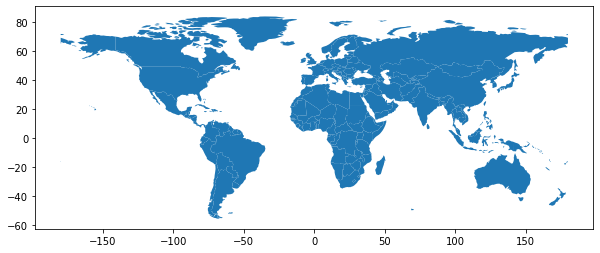

In [122]:
countries.plot(figsize=(10,10))

The `.crs` attribute is given as a dictionary. In this case, it only indicates the EPSG code, but it can also contain the full "proj4" string (in dictionary form). 

Under the hood, GeoPandas uses the `pyproj` / `proj4` libraries to deal with the re-projections.

For more information, see also http://geopandas.readthedocs.io/en/latest/projections.html.

---

There are sometimes good reasons you want to change the coordinate references system of your dataset, for example:

- different sources with different crs -> need to convert to the same crs
- distance-based operations -> if you a crs that has meter units (not degrees)
- plotting in a certain crs (eg to preserve area)

We can convert a GeoDataFrame to another reference system using the `to_crs` function. 

For example, let's convert the countries to the World Mercator projection (http://epsg.io/3395):

In [133]:
countries_mercator = countries.to_crs(epsg=3395) 

<AxesSubplot:>

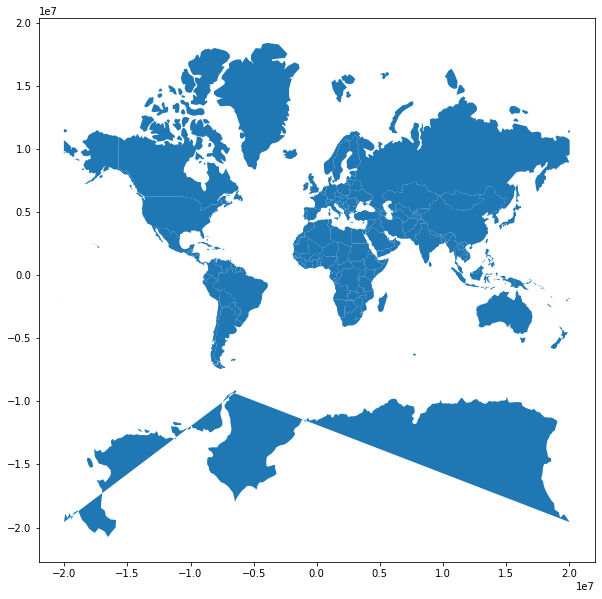

In [135]:
countries_mercator.plot(figsize=(10,10))

In [136]:
countries_no_aa = countries[(countries['name'] != "Antarctica")]

<AxesSubplot:>

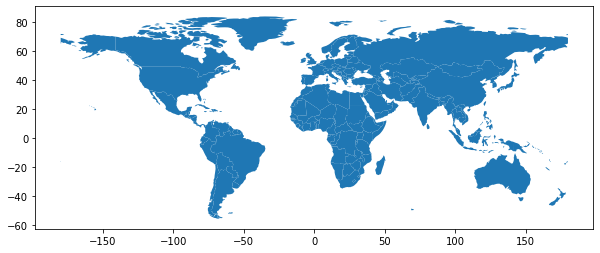

In [137]:
countries_no_aa.plot(figsize=(10,10))

### Using proj4 strings is sufficient too

In [143]:
countries_sinus = countries.to_crs("+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs") 

<AxesSubplot:>

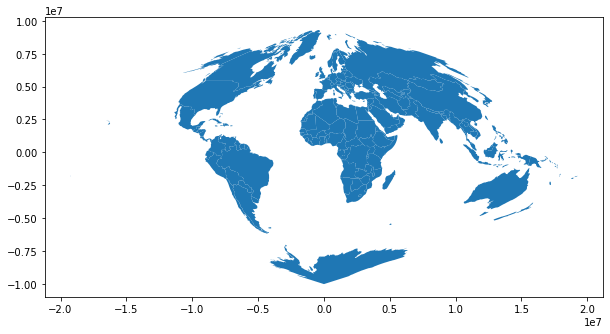

In [144]:
countries_sinus.plot(figsize=(10,10))

## Plotting our different layers together

[(-20.0, 60.0), (-40.0, 40.0)]

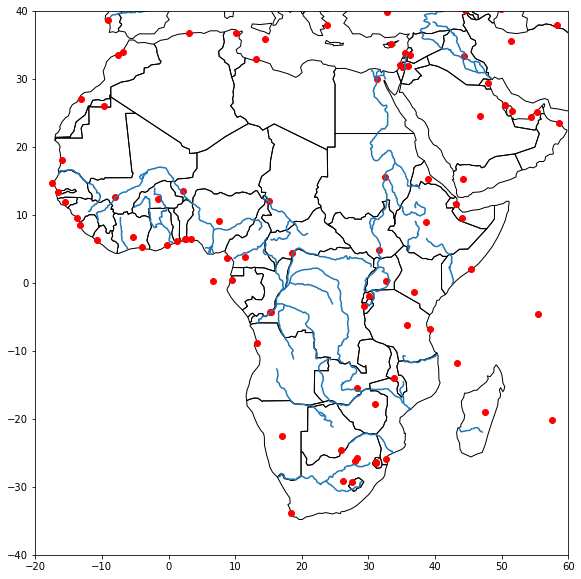

In [147]:
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='red')
ax.set(xlim=(-20, 60), ylim=(-40, 40))

See the [04-more-on-visualization.ipynb](04-more-on-visualization.ipynb) notebook for more details on visualizing geospatial datasets.

## A bit more on importing and creating GeoDataFrames

### Constructing a GeoDataFrame manually

In [87]:
geopandas.GeoDataFrame({
    'geometry': [Point(1, 1), Point(2, 2)],
    'attribute0': [3, 6],
    'attribute1': [0.3, 0.6]})

,geometry,attribute0,attribute1
0,POINT (1.00000 1.00000),3,0.3
1,POINT (2.00000 2.00000),6,0.6


### Creating a GeoDataFrame from an existing dataframe

For example, if you have lat/lon coordinates in two columns:

In [102]:
df = pd.DataFrame(
    {'City': ['Windhoek', 'Walvisbaai', 'Rundu', 'Swakopmud', 'Katima Mulilo'],
     'Country': ['Namibia', 'Namibia', 'Namibia', 'Namibia', 'Namibia'],
     'Population':[322500, 85000, 63431, 34300, 28700],
     'Latitude': [-22.57, -22.94, -17.92, -22.67, -17.50],
     'Longitude': [17.08, 14.51, 19.77, 14.53, 24.28]})

In [103]:
df['Coordinates']  = list(zip(df.Longitude, df.Latitude))

In [104]:
df['Coordinates'] = df['Coordinates'].apply(Point)

In [105]:
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')

In [106]:
gdf

,City,Country,Population,Latitude,Longitude,Coordinates
0,Windhoek,Namibia,322500,-22.57,17.08,POINT (17.08000 -22.57000)
1,Walvisbaai,Namibia,85000,-22.94,14.51,POINT (14.51000 -22.94000)
2,Rundu,Namibia,63431,-17.92,19.77,POINT (19.77000 -17.92000)
3,Swakopmud,Namibia,34300,-22.67,14.53,POINT (14.53000 -22.67000)
4,Katima Mulilo,Namibia,28700,-17.50,24.28,POINT (24.28000 -17.50000)


[(-20.0, 60.0), (-40.0, 50.0)]

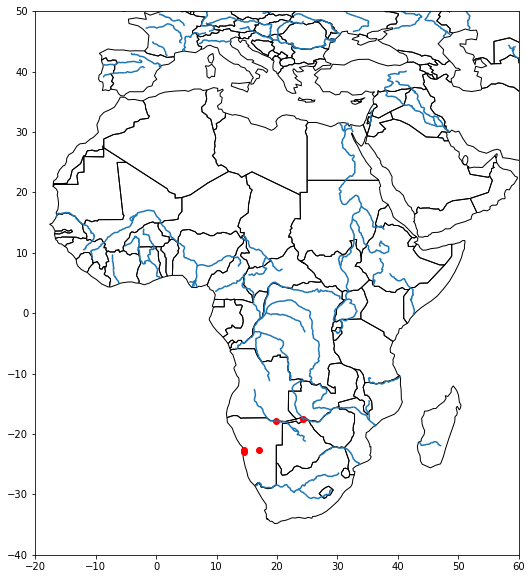

In [165]:
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(10, 10))
rivers.plot(ax=ax)
gdf.plot(ax=ax, color='red')
ax.set(xlim=(-20, 60), ylim=(-40, 50))

### Change view

[(10.0, 30.0), (-30.0, -15.0)]

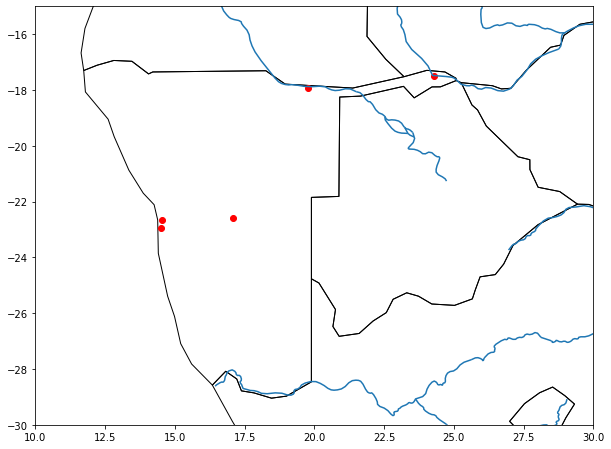

In [166]:
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(10, 10))
rivers.plot(ax=ax)
gdf.plot(ax=ax, color='red')
ax.set(xlim=(10, 30), ylim=(-30, -15))

See http://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html#sphx-glr-gallery-create-geopandas-from-pandas-py for full example

---
## Spatial operations

In [169]:
# to make sure we use the same data, load again using packed data
countries = geopandas.read_file("zip://./data/ne_110m_admin_0_countries.zip")
cities = geopandas.read_file("zip://./data/ne_110m_populated_places.zip")
rivers = geopandas.read_file("zip://./data/ne_50m_rivers_lake_centerlines.zip")

## Spatial relationships

Geospatial data can be used to get to know how spatial objects relate to each other.
In GIS-theory the DE-9IM model is common for describing topological relations (see https://en.wikipedia.org/wiki/DE-9IM).

![](img/TopologicSpatialRelations2.png)
(See also [Krauss, CC BY-SA 3.0](https://en.wikipedia.org/wiki/Spatial_relation#/media/File:TopologicSpatialRelarions2.png))

### Relationships between individual objects

Creating some toys:

A polygon <small>(note: we use `.squeeze()` here to to extract the scalar geometry object from the GeoSeries of length 1)</small>:

In [173]:
namibia = countries.loc[countries['name'] == 'Namibia', 'geometry'].squeeze()

Two points:

In [176]:
wh = cities.loc[cities['name'] == 'Windhoek', 'geometry'].squeeze()
gb = cities.loc[cities['name'] == 'Gaborone', 'geometry'].squeeze()

And a linestring:

In [178]:
from shapely.geometry import LineString
line = LineString([wh, gb])

Let's visualize those 4 geometry objects together (I only put them in a GeoSeries to easily display them together with the geopandas `.plot()` method):

<AxesSubplot:>

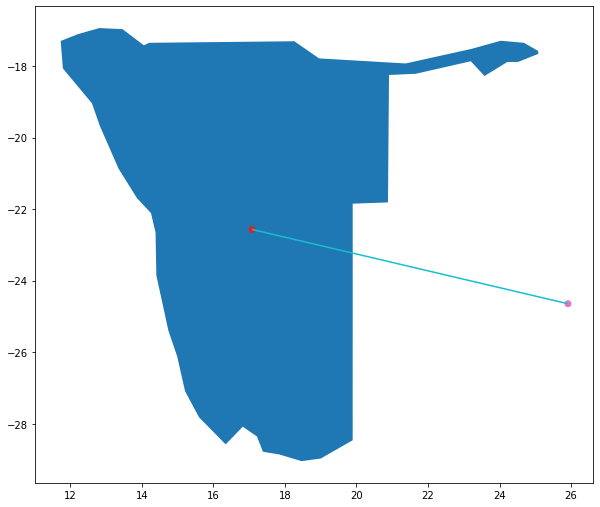

In [183]:
geopandas.GeoSeries([namibia, wh, gb, line]).plot(cmap='tab10', figsize=(10,10))

Recognize the abstract shape of Namibia.

Windhoek, the capital of Namibia, is thus located within Namibia. This is a spatial relationship, and we can test this using the individual shapely geometry objects as follow:

In [184]:
wh.within(namibia)

True

In [187]:
namibia.contains(wh)

True

On the other hand, Gaborone is not located in Namibia:

In [188]:
namibia.contains(gb)

False

In [189]:
gb.within(namibia)

False

The straight line we draw from Paris to Brussels is not fully located within Belgium, but it does intersect with it:

In [190]:
namibia.contains(line)

False

In [191]:
namibia.intersects(belgium)

False

### Spatial relationships with GeoDataFrames

Methods, are available on individual `shapely` geometries are also available as methods on `GeoSeries` / `GeoDataFrame` objects.

For example, if we call the `contains` method on the world dataset with the `wh` point, it will do this spatial check for each country in the `world` dataframe:

In [193]:
countries.contains(wh)

0      False
1      False
2      False
3      False
4      False
       ...  
172    False
173    False
174    False
175    False
176    False
Length: 177, dtype: bool

Because the above gives us a boolean result, we can use that to filter the dataframe:

In [194]:
countries[countries.contains(wh)]

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
112,NAM,Namibia,Africa,2484780.0,25990.0,"POLYGON ((11.73420 -17.30189, 12.21546 -17.111..."


The variable for Windhoek, `wh` can be found once.

Another example, extracting the linestring of the Okavango river, we can query through which countries the river flows:

In [195]:
oka = rivers[rivers['name'] == 'Okavango'].geometry.squeeze()

In [200]:
countries[countries.intersects(oka)]  # .crosses does it also

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
25,BWA,Botswana,Africa,2214858.0,35900.0,"POLYGON ((29.43219 -22.09131, 28.01724 -22.827..."
112,NAM,Namibia,Africa,2484780.0,25990.0,"POLYGON ((11.73420 -17.30189, 12.21546 -17.111..."


<div class="alert alert-info" style="font-size:100%">
<b>Take away</b>: <br><br>

Overview of the different functions to check spatial relationships (*spatial predicate functions*):

<ul>
  <li>`equals`</li>
  <li>`contains`</li>
  <li>`crosses`</li>
  <li>`disjoint`</li>
  <li>`intersects`</li>
  <li>`overlaps`</li>
  <li>`touches`</li>
  <li>`within`</li>
  <li>`covers`</li>
</ul>

<p>
See https://shapely.readthedocs.io/en/stable/manual.html#predicates-and-relationships for an overview of those methods.
<p></p>

</div>

### Outlook: Spatial operations

Next to the spatial predicates that return boolean values, Shapely and GeoPandas aslo provide analysis methods that return new geometric objects.

See https://shapely.readthedocs.io/en/stable/manual.html#spatial-analysis-methods for more details.

We build a buffer around Windhoek (which returns a Polygon):

<AxesSubplot:>

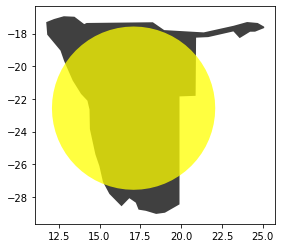

In [219]:
geopandas.GeoSeries([namibia, wh.buffer(5)]).plot(alpha=0.75, cmap='gnuplot')

or intersection, union or difference of those two polygons:

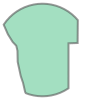

In [220]:
wh.buffer(5).intersection(namibia)

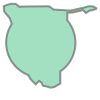

In [221]:
wh.buffer(5).union(namibia)

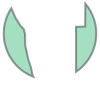

In [222]:
wh.buffer(5).difference(namibia)

Method `unary_union` converts the set of geometry objects in a GeoDataFrame into a single geometry object by taking the union of all those geometries.

Build a single object for Africa:

In [223]:
africa_countries = countries[countries['continent'] == 'Africa']

In [224]:
africa = africa_countries.unary_union

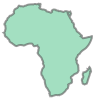

In [225]:
africa

In [226]:
print(str(africa)[:1000])

MULTIPOLYGON (((32.83012047702888 -26.7421916643362, 32.58026492689768 -27.47015756603182, 32.46213260267845 -28.30101124442056, 32.20338870619304 -28.75240488049007, 31.52100141777888 -29.25738697684626, 31.325561150851 -29.40197763439891, 30.90176272962535 -29.90995696382804, 30.62281334811382 -30.42377573010613, 30.05571618014278 -31.14026946383296, 28.92555260591954 -32.1720411109725, 28.2197558936771 -32.77195281344886, 27.46460818859597 -33.2269637997788, 26.41945234549283 -33.61495045342619, 25.90966434093349 -33.6670402971764, 25.7806282895007 -33.94464609144834, 25.17286176931597 -33.79685149509358, 24.67785322439212 -33.98717579522455, 23.59404340993464 -33.79447437920815, 22.98818891774474 -33.91643075941698, 22.57415734222224 -33.86408253350531, 21.54279910654103 -34.25883879978294, 20.689052768647 -34.41717538832523, 20.07126102059763 -34.79513681410799, 19.61640506356457 -34.81916635512371, 19.19327843595872 -34.46259897230979, 18.85531456876987 -34.44430551527847, 18.424

<div class="alert alert-info" style="font-size:120%">
<b>Take away</b>: <br><br>

GeoPandas (and Shapely for the individual objects) provides a whole lot of basic methods to analyse the geospatial data (distance, length, centroid, boundary, convex_hull, simplify, transform, ....), much more than the few that we can touch in this tutorial.


<ul>
  <li>An overview of all methods provided by GeoPandas can be found here: http://geopandas.readthedocs.io/en/latest/reference.html</li>
</ul>

</div>

